# Chapter 1: A brief introduction to detectors

## Models for decaying correlation functions
Experimental and simulated dynamics information is often assumed to be described based on a time-correlation function, which relates the state of some parameter at an initial time to its value at a later time. The time-correlation is the *average* of that relationship. For example, for some parameter which varies with time, $A(\tau)$, the simplest time-correlation function would be
\begin{equation}
C(t)=\langle X(\tau)\cdot X(t+\tau)\rangle_\tau
\end{equation}
where the brackets ($\langle\rangle_\tau$) indication an average over the initial time $\tau$.

Then, the time-function often decays in time, indicating that the value of $X(t+\tau)$ eventually becomes uncorrelated with its value at some earlier time, $X(\tau)$. A simple model for this behavior is to assume the correlation function has the form
\begin{equation}
C(t)=\left(\langle X(t)^2\rangle_\tau-\langle X(t)\rangle_\tau^2\right)e^{-t/\tau_c}+\langle X(t)\rangle_\tau^2.
\end{equation}
In this simple case, the correlation time, $\tau_c$, indicates how quickly the correlation decays. For motion, a shorter $\tau_c$ indicates a faster motion, and a longer $\tau_c$ indicates a slower motion. $\langle X(\tau)\rangle_\tau$ is simply the average of the parameter $X(\tau)$, and ($\langle X(t)^2\rangle_\tau-\langle X(t)\rangle_\tau^2$) is its variance (standard deviation squared)

It can be, however, that multiple motions affect the decorrelation, in which case the correlation function can be modeled more generally as
\begin{equation}
C(t)=\langle X(t)\rangle_\tau^2+\sum\limits_i{A_i\exp(-t/\tau_i)}
\end{equation}
In this case, the $A_i$ add up to the total variance ($\langle X(t)^2\rangle_\tau-\langle X(t)\rangle_\tau^2$), but each corresponds to a different correlation time, representing contributions from different motions with varying speeds. This expression suggests a number of discrete motions, but it is also possible to obtain a continuum of correlation times, in which case we would better represent the situation with an infinite number of amplitudes, given as an integral:
\begin{equation}
C(t)=\langle X(t)\rangle_\tau^2+\int\limits_{-\infty}^\infty{\theta(z)\exp(-t/(10^z\cdot1\mathrm{ s})dz}
\end{equation}
In this representation, $z$ is the log-correlation time ($z=\log_{10}(\tau_c/\mathrm{s})$), and $\theta(z)$ is the distribution of correlation times as a function of the log-correlation time. $\theta(z)$ must then integrate to the total variance.

## The angular correlation function for NMR
In NMR, a major source of relaxation is due to the stochastic reoriention of anisotropy interaction tensors, such as dipole couplings, chemical shift anisotropies (CSA), and quadrupole couplings. Then, we cannot use a strictly linear correlation function, but rather must use the rank-2 tensor correlation function (which can be constructed from a sum of linear correlation functions).
\begin{equation}
C(t)=\left\langle\frac{3\cos^2\beta_{\tau,t+\tau}-1}{2}\right\rangle_\tau
\end{equation}
Here, $\beta_{\tau,t+\tau}$ is the angle between the z-component of the relevant tensor at some time $\tau$ and a later time, $t+\tau$. For example, for a one-bond dipole coupling, this is just the angle between the bond between the two times $\tau$ and $t+\tau$.

Given the full correlation function, a given relaxation rate constant may be obtained by first calculating the spectral density function, $J(\omega)$, which is the Fourier transform of the correlation function
\begin{equation}
J(\omega)=\frac25\int\limits_0^\infty{C(t)\exp(-i\omega t)dt}.
\end{equation}
Then, for example, $T_1$ relaxation of a $^{13}$C nucleus due to a single bonded $^1$H and its CSA is given by
\begin{equation}
R_1=\left(\frac{\delta_\mathrm{HC}}{4}\right)^2(J(\omega_\mathrm{H}-\omega_\mathrm{C})+3J(\omega_\mathrm{C})+6J(\omega_\mathrm{H}+\omega_\mathrm{C}))+\frac13(\omega_\mathrm{C}\Delta\sigma)^2J(\omega_\mathrm{C})
\end{equation}
In this equation, $R_1$ is the longitudinal relaxation rate constant for $^{13}$C ($1/T_1=R_1$), with $\delta_\mathrm{HC}$ being the anisotropy of the dipole coupling and $\Delta\sigma_\mathrm{C}$ the width of the CSA in ppm. The $J(\omega)$ are sampled at the $^1$H and $^13$C Larmor frequencies in addition to their sums and differences (given in radians/s).

Usually, relaxation due to reorientational motion can be expressed as a sum over the spectral density sampled at various frequencies:
\begin{equation}
R_\zeta=\sum\limits_i{a_iJ(\omega_i)}
\end{equation}.

The models of the correlation function given above are still valid, but we typically write them as:
\begin{eqnarray}
C(t)&=&S^2+(1-S^2)\sum\limits_i{A_i\exp(-t/\tau_i}) \\
&=&S^2+(1-S^2)\int\limits_{-\infty}^\infty{\theta(z)\exp(-t/(10^z\cdot\mathrm{ s}))dz}
\end{eqnarray}
Here, $S^2$ is defined as:
\begin{equation}
S^2=\lim_{t\rightarrow\infty}C(t)
\end{equation}

## Fitting dynamics data
Whether we have NMR data, or other dynamics data depending on some form of time-correlation function, we can, in principle, fit the experimental data based on some model of the correlation function. However, the challenge is, if we don't know the model, how valuable are these fits? We'll start by taking some example motion, characterized by 3 motions and calculate a few relaxation rate constants for those motions.

<IPython.core.display.Javascript object>


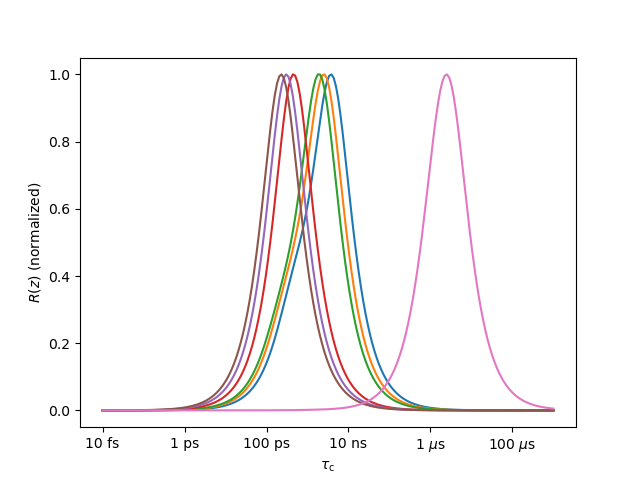

In [28]:
import sys #
sys.path.append('../../')
import pyDR   #Import the pyDR software, which includes functions for calculating NMR relaxation rate constants
from pyDR.misc.tools import linear_ex #Convenient tool for interpolating between data points
import numpy as np #Lots of nice linear algebra tools
import matplotlib.pyplot as plt #Plotting tools

#Zoomable plots with matplotlib notebook
%matplotlib notebook

z=[-11,-9.5,-7.5]  #These are log-correlation times, corresponding to 10 ps, 1 ns, and 1 μs, respectively
A=[.05,.2,.03]  #These are the corresponding amplitudes. The total amplitude of motion is 0.38 (S^2=0.62)

nmr=pyDR.Sens.NMR()  #This is a container for NMR experiments, which give the relaxation rates as a function of z
nmr.new_exper(Type='R1',v0=[400,600,800],Nuc='15N') #Add 3 experiments: 15N T1 at 400, 600, and 800
#We assume by default N15 coupled to a single proton (22.954 kHz = 2*11.477) and CSA of 113 ppm (z-component)
nmr.new_exper(Type='NOE',v0=[400,600,800],Nuc='15N') #Add 3 more experiments H–N NOE at same conditions as T1
nmr.new_exper(Type='R1p',v0=800,vr=60,v1=10,Nuc='15N') #Add an R1p (MAS=60 kHz, spin-lock at 10 kHz)
labels=[r'$R_1$(400 MHz)',r'$R_1$(600 MHz)',r'$R_1$(800 MHz)',
        r'$\Gamma_\mathrm{HC}(400 MHz)$',r'$\Gamma_\mathrm{HC}(600 MHz)$',
        r'$\Gamma_\mathrm{HC}(800 MHz)$',r'$R_{1\rho}$']

_=nmr.plot_Rz(norm=True) #Plot the 9 relaxation rate constants (normalized to max of 1) vs tc

Now we can construct the relaxation rate constants for the seven experiments above, by simply summing over the three correlation times and amplitudes

<IPython.core.display.Javascript object>


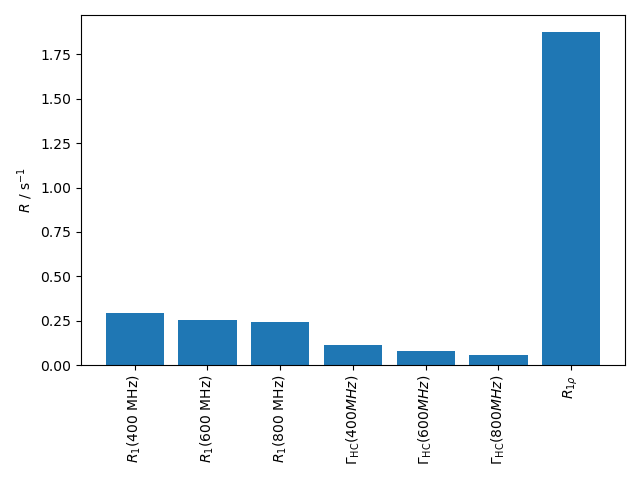

In [29]:
R=np.zeros(nmr.rhoz.shape[0])  #Pre-allocate an array with 7 relaxation rates
for z0,A0 in zip(z,A):    #Iterate over all correlation times, amplitudes
    R+=A0*linear_ex(nmr.z,nmr.rhoz,z0)

ax=plt.subplots()[1]
ax.bar(range(len(R)),R)
#Some figure cleanup/labeling
ax.set_xticks(range(len(R)))
ax.set_xticklabels(labels,rotation=90)
ax.set_ylabel(r'$R$ / s$^{-1}$')
ax.figure.tight_layout()

Now, the question is, can we fit this data based on a model of the correlation function, and does that model have to match the original model. For demonstration purposes, we try a model that only has two correlation times.

In [33]:
#Function to calculate relaxation rate constants
def calcR(z,A,nmr):
    R=np.zeros(nmr.rhoz.shape[0])
    for z0,A0 in zip(z,A):    #Iterate over all correlation times, amplitudes
        R+=A0*linear_ex(nmr.z,nmr.rhoz,z0)
    return R

#Function to calculate error of fit
def error(zf,Af):
    Ri=calcR(z,A,nmr)
    Rc=calcR(zf,Af,nmr)
    return np.sum((Ri-Rc)**2)

In [34]:
error([-11,-10],[.1,.1])

3.4289422033192176